In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt 
import datetime
#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#2: normalize images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0 # [0, 1]
x_test / 255.0

#3: one-hot encoding
y_train = tf.keras.utils.to_categorical (y_train) # (60000, 10) 
y_test = tf.keras.utils.to_categorical (y_test) # (10000, 10)
#4: build a model
#4-1
##init = tf.keras.initializers.he_normal() # 
##act = 'he_normal'
#4-2
tf.keras.activations.relu
##init = tf.keras.initializers.he_normal() 
# ##act = tf.keras.layers.LeakyReLU(alpha=0.3)
#4-3
# 'relu'
# 'he_normal'
init = tf.keras.initializers.he_uniform() # 'he_uniform' 
act = tf.keras.layers.LeakyReLU(alpha=0.3)

In [2]:
n = 100
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=n, activation=act, kernel_initializer=init)) 
model.add(tf.keras.layers.Dense (units=10, activation='softmax', kernel_initializer=init))
model.summary()
opt = tf.keras.optimizers. RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 100)               10100     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               1

c:\Users\nonel\anaconda3\Lib\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer HeUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [2]:
import os
path = "C:/Users/nonel/tmp/log/"
if not os.path.isdir(path):
    os.mkdir(path)
##logdir = path + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
logdir = path + "3203"

file_writer = tf.summary.create_file_writer(logdir + "/gradient")
file_writer.set_as_default()




In [17]:
#6: calculate averages and histograms of gradients in layers 
class GradientCallback(tf.keras.callbacks.Callback):
##
##
    def __init__(self, freq=10):
        # super(GradientCallback, self).__init__() 
        self.freq = freq

    def on_epoch_end (self, epoch, logs):
        if epoch%self.freq != 0: 
            return
        with tf.GradientTape() as tape:
            y_pred = model (x_train) # tensor, logits
            loss = tf.keras. losses.binary_crossentropy(y_train, y_pred) 
        grads = tape.gradient(loss, model.trainable_weights)

        print("len(grads) = ", len(grads))
        print("len(model.layers) = ", len(model.layers))

        for n in range(1, len(model.layers)):
            i2 = (n-1)*2    # weights
            i1 = i2 + 1     # biases
            print("i2 = ", i2)
            print("i1 = ", i1)
            bias_avg = tf.reduce_mean(tf.abs(grads[i1])) 
            weight_avg = tf.reduce_mean(tf.abs(grads[i2]))
            tf.summary.scalar ("layer_%d/avg/bias "%n, data=bias_avg, step=epoch) 
            tf.summary.scalar ("layer_%d/avg/weight" %n, data=weight_avg, step=epoch)
            tf.summary.histogram ("layer_%d/hist/bias" %n, data=grads [i1], step=epoch) 
            tf.summary.histogram ("layer_%d/hist/weight"%n, data=grads [i2], step=epoch)

    def on_train_end(self, logs):
        tf.summary.flush()

In [12]:

callback1 = GradientCallback() # freq = 10
callback2 = tf.keras.callbacks.TensorBoard (log_dir=logdir, histogram_freq= 10) #profile_batch=0

#7: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2, 
                verbose=2, callbacks = [callback1, callback2])

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/101


KeyboardInterrupt: 

In [21]:
from keras import layers 
from keras import models

model = models. Sequential()
#필터 수, 패치 사이즈(3X3), 요소별 적용할 활성화 함수, 입력 특성 맵 사이즈 
model.add(layers. Conv2D(1, (3,3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers. MaxPooling2D ((2,2)))
model.add(layers.Flatten()) # 특성공학 결과물 1차원 텐서(벡터)로 변환하는 층
# 완전 연결 분류기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 출력층: 최상위층, 분류 결과물 확률 꼴로 변환.
# 모델 설계 결과 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 1)         10        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 1)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 169)               0         
                                                                 
 dense_8 (Dense)             (None, 64)                10880     
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 11540 (45.08 KB)
Trainable params: 11540 (45.08 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [22]:
opt = tf.keras.optimizers. RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:

callback1 = GradientCallback() # freq = 10
callback2 = tf.keras.callbacks.TensorBoard (log_dir=logdir, histogram_freq= 10) #profile_batch=0

#7: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2, 
                verbose=2, callbacks = [callback2])
                # verbose=2, callbacks = [callback1, callback2])

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/101
240/240 - 5s - loss: 0.3885 - accuracy: 0.8821 - val_loss: 0.2282 - val_accuracy: 0.9304 - 5s/epoch - 19ms/step
Epoch 2/101
240/240 - 6s - loss: 0.1726 - accuracy: 0.9473 - val_loss: 0.1410 - val_accuracy: 0.9587 - 6s/epoch - 25ms/step
Epoch 3/101
240/240 - 6s - loss: 0.1320 - accuracy: 0.9582 - val_loss: 0.1676 - val_accuracy: 0.9485 - 6s/epoch - 24ms/step
Epoch 4/101
240/240 - 6s - loss: 0.1090 - accuracy: 0.9661 - val_loss: 0.1282 - val_accuracy: 0.9629 - 6s/epoch - 24ms/step
Epoch 5/101
240/240 - 6s - loss: 0.0972 - accuracy: 0.9693 - val_loss: 0.1151 - val_accuracy: 0.9640 - 6s/epoch - 25ms/step
Epoch 6/101
240/240 - 6s - loss: 0.0860 - accuracy: 0.9724 - val_loss: 0.1073 - val_accuracy: 0.9680 - 6s/epoch - 26ms/step
Epoch 7/101
240/240 - 6s - loss: 0.0781 - accuracy: 0.9747 - val_loss: 0.1188 - val_accuracy: 0.9653 - 6s/epoch - 24ms/step
Epoch 8/101
240/240 - 6s - loss: 0.0709 - accuracy: 0.9773 - val_loss: 0.1479 - val_accuracy: 0.9590 - 6s/epoch - 25ms/step
Epoch 9/

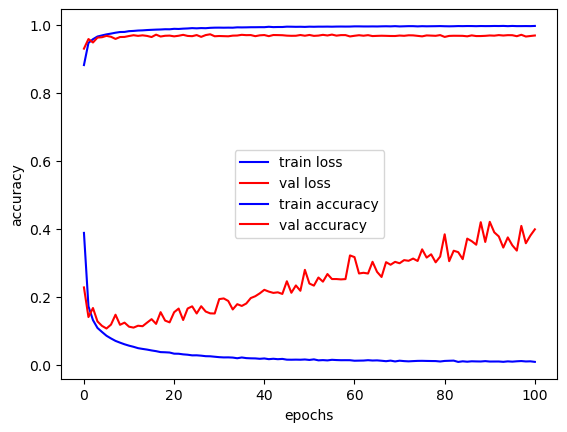

In [25]:
#4-3: plot accuracies
# plt.title("Dropout rate = %s, %s traing data in mnist" % (dropout_rate, n_sample)) 
plt.plot(ret.history['loss'], "b-", label="train loss")
plt.plot(ret.history['val_loss'], "r-", label="val loss")
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

In [26]:
from keras import layers 
from keras import models
#간단한 컨브넷 작성
# 이미지 특징 추출 층(합성곱 기반 층)
model = models. Sequential()
#필터 수, 패치 사이즈(3X3), 요소별 적용할 활성화 함수, 입력 특성 맵 사이즈 
model.add(layers. Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1))) 
model.add(layers. MaxPooling2D ((2,2)))
# activation='relu': 음수, 0은 모두 0으로 만들고, 양수 값만 남긴다. 
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers. MaxPooling2D ((2,2)))
model.add(layers. Conv2D(64, (3,3),activation='relu'))
model.add(layers.Flatten()) # 특성공학 결과물 1차원 텐서(벡터)로 변환하는 층
# 완전 연결 분류기
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) # 출력층: 최상위층, 분류 결과물 확률 꼴로 변환.
# 모델 설계 결과 요약
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 576)              

In [27]:
opt = tf.keras.optimizers. RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:

callback1 = GradientCallback() # freq = 10
callback2 = tf.keras.callbacks.TensorBoard (log_dir=logdir, histogram_freq= 10) #profile_batch=0

#7: train and evaluate the model
ret = model.fit(x_train, y_train, epochs=101, batch_size=200, validation_split=0.2, 
                verbose=2, callbacks = [callback2])
                # verbose=2, callbacks = [callback1, callback2])

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

Epoch 1/101
240/240 - 28s - loss: 0.3654 - accuracy: 0.8868 - val_loss: 0.0882 - val_accuracy: 0.9724 - 28s/epoch - 115ms/step
Epoch 2/101
240/240 - 25s - loss: 0.0786 - accuracy: 0.9756 - val_loss: 0.0539 - val_accuracy: 0.9852 - 25s/epoch - 103ms/step
Epoch 3/101
240/240 - 25s - loss: 0.0490 - accuracy: 0.9842 - val_loss: 0.0528 - val_accuracy: 0.9827 - 25s/epoch - 106ms/step
Epoch 4/101
240/240 - 25s - loss: 0.0366 - accuracy: 0.9884 - val_loss: 0.0422 - val_accuracy: 0.9880 - 25s/epoch - 103ms/step
Epoch 5/101
240/240 - 26s - loss: 0.0286 - accuracy: 0.9905 - val_loss: 0.0463 - val_accuracy: 0.9869 - 26s/epoch - 108ms/step
Epoch 6/101
240/240 - 27s - loss: 0.0238 - accuracy: 0.9922 - val_loss: 0.0419 - val_accuracy: 0.9882 - 27s/epoch - 114ms/step
Epoch 7/101
240/240 - 31s - loss: 0.0185 - accuracy: 0.9941 - val_loss: 0.0430 - val_accuracy: 0.9892 - 31s/epoch - 131ms/step
Epoch 8/101
240/240 - 26s - loss: 0.0148 - accuracy: 0.9952 - val_loss: 0.0366 - val_accuracy: 0.9908 - 26s/epo

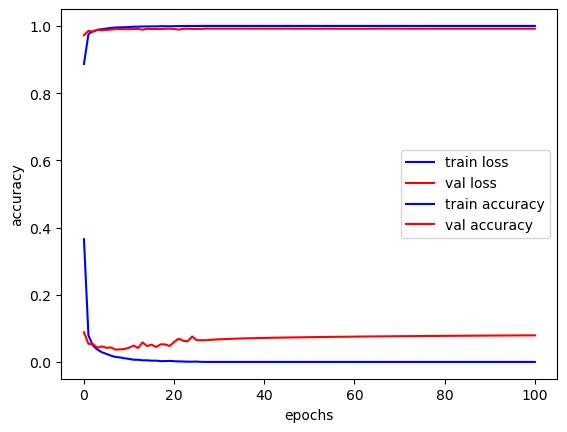

In [29]:
#4-3: plot accuracies
# plt.title("Dropout rate = %s, %s traing data in mnist" % (dropout_rate, n_sample)) 
plt.plot(ret.history['loss'], "b-", label="train loss")
plt.plot(ret.history['val_loss'], "r-", label="val loss")
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show()

In [34]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dense 
from tensorflow.keras.layers import BatchNormalization, Dropout, Flatten 
from tensorflow.keras.optimizers import RMSprop 
import numpy as np
import matplotlib.pyplot as plt
#1:
##gpus = tf.config.experimental.list_physical_devices ('GPU') 
##tf.config.experimental.set_memory_growth(gpus[0], True)
#2
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0 # [0.0, 1.0]
x_test /= 255.0
# expand data with channel = 1
x_train = np.expand_dims(x_train, axis=3) # (60000, 28, 28, 1) 
x_test = np.expand_dims (x_test, axis=3) # (10000, 28, 28, 1)
# one-hot encoding
y_train = tf.keras.utils.to_categorical (y_train) 
y_test = tf.keras.utils.to_categorical(y_test)

In [35]:
#3: build a sequential model
model = tf.keras.Sequential()
model.add(Input (x_train.shape[1:])) # shape=(28, 28, 1)
model.add(Conv2D(filters=16, kernel_size = (3,3), activation='relu')) 
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D (filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D())
model.add(Dropout (rate=0.2))
model.add(Flatten())
model.add(Dense (units=10, activation='softmax'))
##model.summary()


In [36]:
#4: train and evaluate the model
opt = RMSprop(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy']) 
ret = model.fit(x_train, y_train, epochs=50, batch_size=1000,
                validation_data = (x_test, y_test), verbose=2)
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2) 
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


Epoch 1/50
60/60 - 21s - loss: 0.8634 - accuracy: 0.7024 - val_loss: 1.9164 - val_accuracy: 0.7401 - 21s/epoch - 348ms/step
Epoch 2/50
60/60 - 21s - loss: 0.5035 - accuracy: 0.8140 - val_loss: 1.6723 - val_accuracy: 0.7558 - 21s/epoch - 346ms/step
Epoch 3/50
60/60 - 20s - loss: 0.4335 - accuracy: 0.8401 - val_loss: 1.4285 - val_accuracy: 0.7778 - 20s/epoch - 338ms/step
Epoch 4/50
60/60 - 22s - loss: 0.3965 - accuracy: 0.8552 - val_loss: 1.2067 - val_accuracy: 0.7734 - 22s/epoch - 359ms/step
Epoch 5/50
60/60 - 23s - loss: 0.3760 - accuracy: 0.8622 - val_loss: 0.9625 - val_accuracy: 0.8375 - 23s/epoch - 391ms/step
Epoch 6/50
60/60 - 23s - loss: 0.3515 - accuracy: 0.8716 - val_loss: 0.7188 - val_accuracy: 0.8467 - 23s/epoch - 377ms/step
Epoch 7/50
60/60 - 25s - loss: 0.3402 - accuracy: 0.8754 - val_loss: 0.5658 - val_accuracy: 0.8742 - 25s/epoch - 416ms/step
Epoch 8/50
60/60 - 23s - loss: 0.3276 - accuracy: 0.8796 - val_loss: 0.4507 - val_accuracy: 0.8774 - 23s/epoch - 378ms/step
Epoch 9/

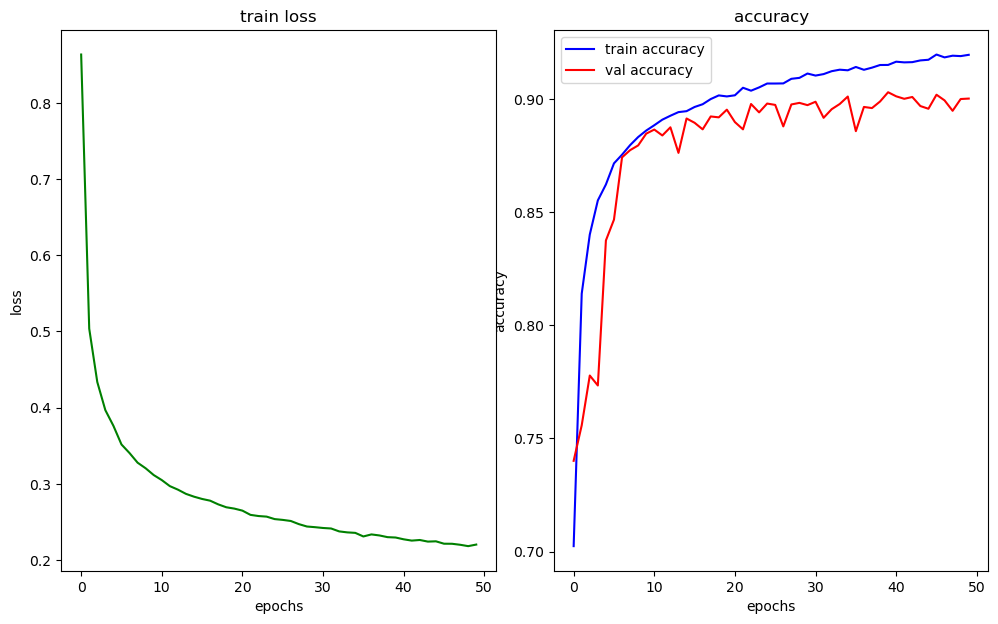

In [37]:
#5: plot accuracy and loss
fig, ax = plt.subplots(1, 2, figsize=(10, 6))
fig.tight_layout()
ax[0].plot(ret.history['loss'], "g-")
ax[0].set_title("train loss")
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[1].plot(ret.history['accuracy'],"b", label="train accuracy")
ax[1].plot(ret. history['val_accuracy'], "r-", label="val accuracy")
ax[1].set_title("accuracy")
ax[1].set_xlabel('epochs') 
ax[1].set_ylabel('accuracy') 
plt.legend(loc="best") 
plt.show()